## Anotaciones: 

- 1002 - Teléfono Servicio Técnico
- 1004 - Teléfono Particulares
- 1489 - Teléfono Empresas

A la hora de hacer los análisis, tengamos en cuenta que, aunque a priori todas las llamadas deberían estar asociadad al número de teléfono/negocio correcto, puede haber personas que llamen por error al que no le corresponde

## Analizar las llamadas de mayo para los siguietnes Casos de Uso: 

- **Gestión de Pedidos** - ¿Cómo va lo mío?
En este caso de uso vamos a incorporar un voicebot para que los clientes particulares puedan hacer seguimiento de un pedido que han solicitado. 
Caso de Uso orientado a B2C (Particulares). Los clientes llaman para consultar ciuál es el estado de un pedido o una conjtratación hecha desde el 1004. 

- **Averías Empresas**
En este caso de uso vamos a automatizar lo que llaman los "Planes de Prueba", un cliente de una empresa llama pprque tiene algún tipo de incidencia con alguna de sus líneas, identificamos cuál es el problema y, si podemos le guiamos en las comprobaciones para identificar qué falla. 
Caso de uso en B2B (Empresas) 1002 y 1489 - Las empresas llaman porque tienen algún tipo de incidencia o avería, "No funciona internet", "No tengo línea", "No tengo WiFi", "Cortes y lentitud en la línea de voz o internet", "Ruido en las llamadas", "No puedo emitir ni recifir llamadas, "Problemas llamadas en fijos", "Voz cascos, "Webex".

- **Averías Particulares**
Este caso de uso sercirá para tratar las averías de particulares. No tenemos todavía mucha información. 


## Entender los datos (WIP)

- **IDU:** Identificador único de la llamada (si es necesario recuperar una transcripción o una escucha utilizaremos este código)
- **NEGOCIO:** 1002 (Servicio Técnico), 1004 (Particulares), 1489 (Empresas)
- **ETIQUETA:** Etiqueta que han asignado a la conversación
- **RESULTADO:** Determina cómo ha terminado la llamada
- **TRANSCRIPCIÓN PA:** Explica de forma breve el motivo de la llamada (no sé sio es un resumen automático)
- **ETIQUETA_ANTERIOR:** Indica de donde viene el cliente
- **SEGMENTO_VRU:** Identifica los diferentes segmentos de clientes (estoy recopilando el significado):
    - CO -
    - FI - Fijo
    - NM -
    - PE - Pequeña Empresa
    - AU - Autónomos
    - NI -
    - EM -
    - NF -
    - PR -
    - GC -
    - TE -
    - ME - Mediana Empresa
    - AM -
    - AF -
    - TELCO_PR - Priority
    - GP -


In [1]:
# Importar excel y leer primeraras lineas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Importar y unir los dos excel que contienen datos de llamadas desde el 5 de mayo hasta el 24 de mayo de 2024

In [2]:
# Leer archivo
df1 = pd.read_csv('data/1-15_Mayo_PA.txt', delimiter='\t', encoding='utf-16')
df2 = pd.read_csv('data/16-31_Mayo_PA.txt', delimiter='\t', encoding='utf-16')

C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\2112972589.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('data/1-15_Mayo_PA.txt', delimiter='\t', encoding='utf-16')
C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\2112972589.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/16-31_Mayo_PA.txt', delimiter='\t', encoding='utf-16')


In [3]:
# Unir df1 y df2
mayo2024_todo = pd.concat([df1, df2])
mayo2024_todo.reset_index(drop=True, inplace=True)

assert df1.shape[0] + df2.shape[0] == mayo2024_todo.shape[0]
mayo2024_todo.shape


(1616244, 22)

In [4]:
mayo2024_todo

,FECHA,HORA,MARCACION,ANI,ANI_VALIDADO,IDU,NEGOCIO,ETIQUETA,RESULTADO,DURACION,...,TRASCRIPCION_PA,NOMBRE_PREGUNTA_ABIERTA,SEG_MARKETING_VALIDADO,NIF_VALIDADO,VRID_LLAMADA,ETIQUETA_ANTERIOR,CLIENTE,SEGMENTO_VRU,TRATAMIENTO,PLATAFORMA
0,2024-05-05 00:00:00.000,11:27:06,1002,620142313,916555740,30002518161714901181,1002,Averia_Desambig_MFE,Transfer Directa a Agente OK,16,...,Avería,Pregunta Abierta Castellano,MMEE,000B62311626,012M15M7A8A6T4IJQ37P62LAES07OQ17,Averia_Desambig,LEGADO,EM,TRANSF,NaN
1,2024-05-05 00:00:00.000,11:26:00,1004,618265503,918640811,30003008541714901113,1002,Internet_Conectividad,Transfer Directa a Agente OK,47,...,No tengo línea no tengo internet no tengo nada,Pregunta Abierta Castellano,74KB,00050399156S,01490V2L6KA85EFH38F8U2LAES07BK3N,Pregunta_Abierta,TELCO,FI,TRANSF,NaN
2,2024-05-05 00:00:00.000,11:26:16,1002,652166390,652166390,30002226891714901118,1004,Factura,Transfer desde Autogestion OK,60,...,Confirmar facturas,Pregunta Abierta Castellano,24DR,00046950901N,00C8CD3V84A7D31MPV7P62LAES0B52IV,Pregunta_Abierta,TELCO,CO,AUTOGE,NaN
3,2024-05-05 00:00:00.000,11:27:11,1489,639043171,913092339,30002570641714901176,1489,Robo_Movil,Transfer Directa a Agente OK,13,...,Robo del móvil,Pregunta Abierta Castellano,PPEE,00002189774J,00C8CD3V84A7D31MPV7P62LAES0B52JA,Pregunta_Abierta,LEGADO,PE,TRANSF,NaN
4,2024-05-05 00:00:00.000,11:28:32,1004,616401823,616401823,30003123681714901266,1002,Internet_Conectividad,Transfer Directa a Agente OK,87,...,No tengo válido estenosis hablar con un comerc...,Pregunta Abierta Castellano,74KB,00050409320J,01490V2L6KA85EFH38F8U2LAES07BK4C,Desambiguar,TELCO,CO,TRANSF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616239,2024-05-27 00:00:00.000,12:28:36,1004,986470588,986470588,30001191341716805711,1004,Facturacion_Pagos,Transfer desde Autogestion OK,79,...,36020593/Pagar ahora/Aura/Pagar factura,Pregunta Abierta Castellano,74GB,00036020593V,00EQVTKE0CA8N5T0HQ6OA2LAES07K60C,Nueva_Pregunta_Abierta,TELCO,FI,AUTOGE,0.0
1616240,2024-05-27 00:00:00.000,12:28:54,1004,676291717,676291717,30002099601716805665,1004,OtrasInformaciones,Transfer Directa a Agente OK,62,...,Contrato/Hablar con operador/otro motivo,Pregunta Abierta Castellano,74KB,NaN,012M15M7A8A6T4IJQ37P62LAES0845DL,MenuOpciones,TELCO,NM,TRANSF,1.0
1616241,2024-05-27 00:00:00.000,12:28:47,1004,650961879,650961879,30002103911716805723,1004,Deuda,Transfer Directa a Agente OK,69,...,51596562/Deseo hablar con un compañero/Quiero ...,Pregunta Abierta Castellano,74KB,00051596562H,012M15M7A8A6T4IJQ37P62LAES0845EO,Pregunta_Abierta,TELCO,CO,TRANSF,0.0
1616242,2024-05-27 00:00:00.000,12:29:20,1004,620923929,937142616,30003175041716805705,1004,Comercial_Resto,Transfer Directa a Agente OK,35,...,NaN,Pregunta Abierta Catalán,NaN,00033898773Q,00QAVCIL6KA85DVAJ2B8A2LAES07M9JI,Comercial_Resto_Desambig,TELCO,FI,TRANSF,0.0


Obtenemos los valores unicos para SEGMENTO_VRU y sus totales

['EM' 'FI' 'CO' 'PE' 'NI' 'NM' 'AU' 'NF' 'GC' 'PR' 'ME' 'AM' 'TE' 'AF' nan
 'TELCO_PR' 'GP']
SEGMENTO_VRU
CO          690930
FI          297034
NM          274116
PE          108730
AU           93610
NI           73833
EM           27053
NF           26308
PR           11580
GC            3925
TE            2943
ME            2760
AM            1189
AF            1104
TELCO_PR       132
GP               8
Name: count, dtype: int64


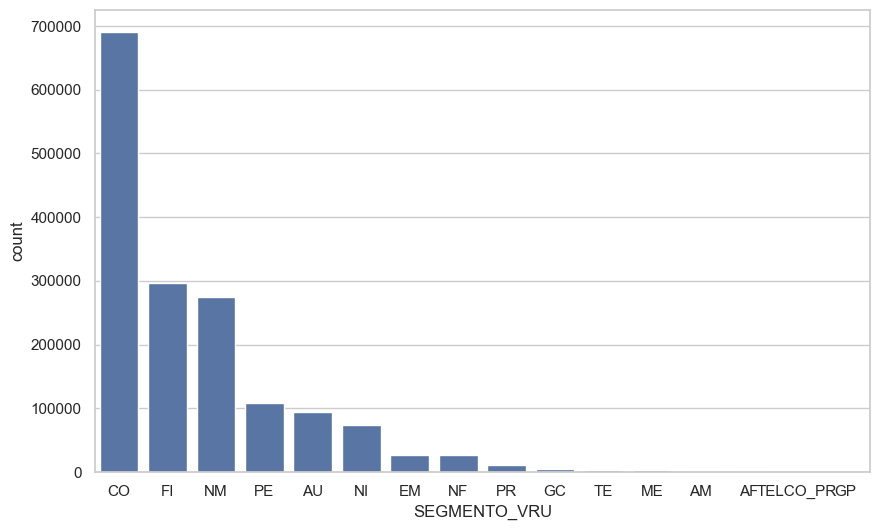

In [5]:
# Print unique values column SEGMENTO_VRU and count
print(mayo2024_todo['SEGMENTO_VRU'].unique())
print(mayo2024_todo['SEGMENTO_VRU'].value_counts())

# Bar chart with the unique values of SEGMENTO_VRU and their count.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='SEGMENTO_VRU', data=mayo2024_todo, order=mayo2024_todo['SEGMENTO_VRU'].value_counts().index)
plt.show()


[1002 1004 1489]
NEGOCIO
1004    1141442
1002     403523
1489      71279
Name: count, dtype: int64


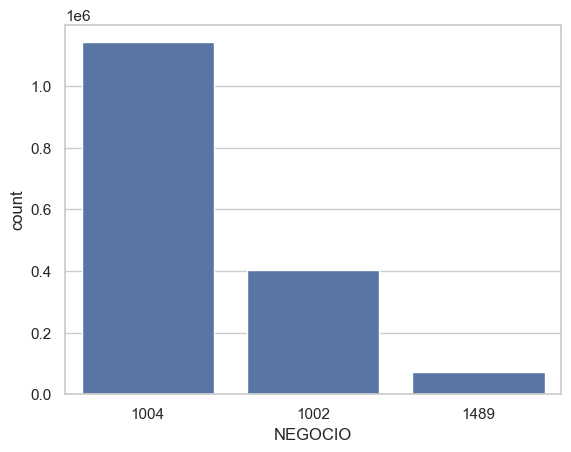

In [6]:
# Print unique values column NEGOCIO and count
print(mayo2024_todo['NEGOCIO'].unique())
print(mayo2024_todo['NEGOCIO'].value_counts())

# Bar chart with the unique values of NEGOCIO and their count.
sns.set_theme(style="whitegrid")
sns.countplot(x='NEGOCIO', data=mayo2024_todo, order=mayo2024_todo['NEGOCIO'].value_counts().index)
plt.show()

['LEGADO' 'TELCO']
CLIENTE
TELCO     1463652
LEGADO     152592
Name: count, dtype: int64


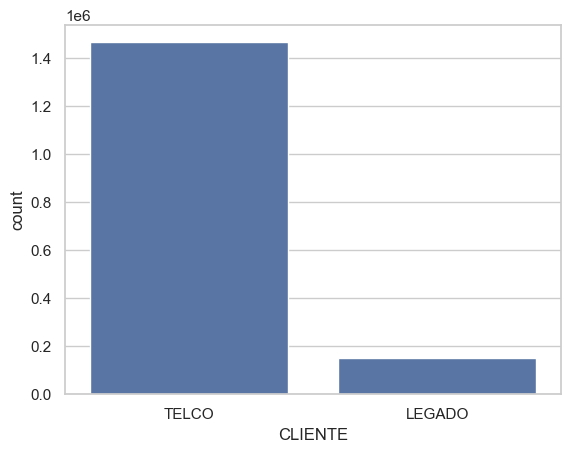

In [7]:
# Print unique values column CLIENTE and count
print(mayo2024_todo['CLIENTE'].unique())
print(mayo2024_todo['CLIENTE'].value_counts())

sns.set_theme(style="whitegrid")
sns.countplot(x='CLIENTE', data=mayo2024_todo, order=mayo2024_todo['CLIENTE'].value_counts().index)
plt.show()

ETIQUETA_ANTERIOR
Pregunta_Abierta                   1044418
Reformulacion                        50710
MenuOpciones                         46492
Baja_Desambig                        45644
Averia_Desambig                      41000
                                    ...   
Origen_OtroServicio_SinEtiqueta          1
5464090121363500                         1
ProteccionDatos                          1
Prosegur_NoCol                           1
630287954                                1
Name: count, Length: 312, dtype: int64


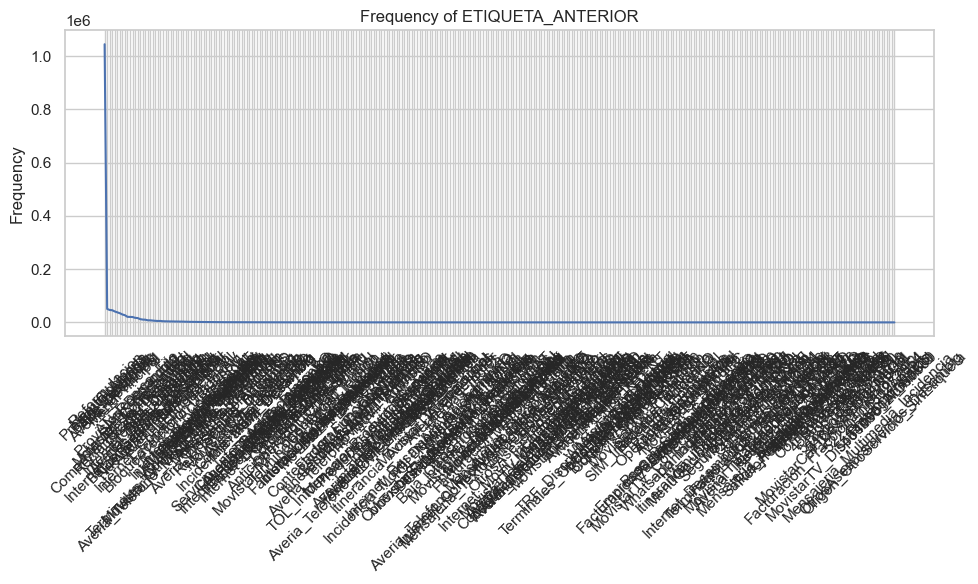

In [8]:
# Print unique values column ETIQUETA_ANTERIOR and count
#print(mayo2024_todo['ETIQUETA_ANTERIOR'].unique())
print(mayo2024_todo['ETIQUETA_ANTERIOR'].value_counts())

# Line chart with the count of the unique values of ETIQUETA_ANTERIOR, without showing the values.
df = mayo2024_todo['ETIQUETA_ANTERIOR'].value_counts().reset_index()
df.columns = ['ETIQUETA_ANTERIOR', 'Frequency']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ETIQUETA_ANTERIOR', y='Frequency', legend=False)
plt.xticks(rotation=45)
plt.title('Frequency of ETIQUETA_ANTERIOR')
plt.xlabel('')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

['TRANSF' 'AUTOGE' 'SINRES' 'LOCTRF' 'COLGAR' 'DESAMB' 'LOCUC' 'LSMSTR'
 'LOCSMS' nan 'DIFER']
TRATAMIENTO
TRANSF    1208032
AUTOGE     139457
SINRES     136430
LOCTRF      77335
LSMSTR      29431
DESAMB      19265
COLGAR       4309
LOCUC        1288
LOCSMS        676
DIFER           7
Name: count, dtype: int64


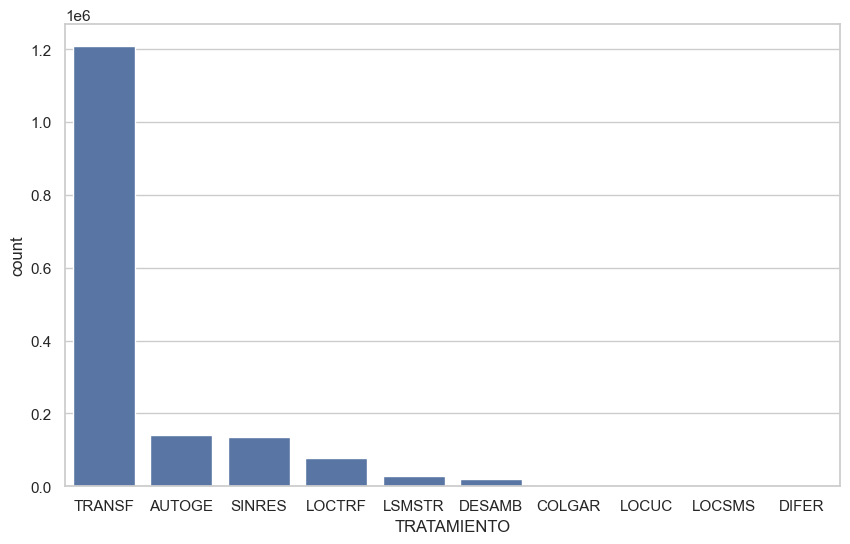

In [9]:
# Print unique values column TRATAMIENTO and count
print(mayo2024_todo['TRATAMIENTO'].unique())
print(mayo2024_todo['TRATAMIENTO'].value_counts())

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='TRATAMIENTO', data=mayo2024_todo, order=mayo2024_todo['TRATAMIENTO'].value_counts().index)
plt.show()

NEGOCIO
1004    1141442
1002     403523
1489      71279
Name: count, dtype: int64


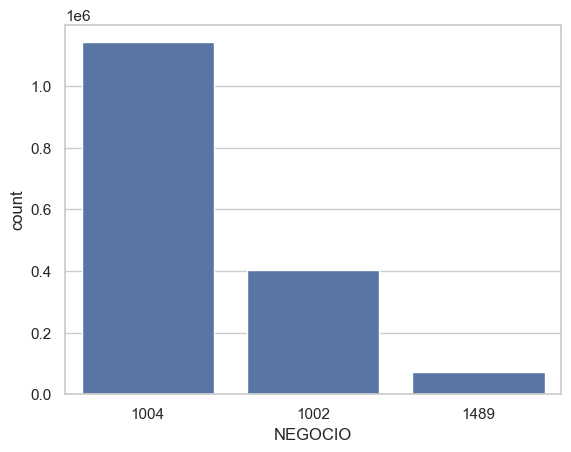

In [10]:
# Valores unicos de la columna negocio
print(mayo2024_todo['NEGOCIO'].value_counts())


sns.set_theme(style="whitegrid")
sns.countplot(x='NEGOCIO', data=mayo2024_todo, order=mayo2024_todo['NEGOCIO'].value_counts().index)
plt.show()

['Averia_Desambig_MFE' 'Internet_Conectividad' 'Factura' 'Robo_Movil'
 'Operador_OrigenMenu' 'Internet_Comercial_Otros' 'Averia_Telefono'
 'Deuda' 'Internet_Conectividad_Wifi' 'Averia_Telefono_Fijo'
 'MovistarTV_Paquetes' 'Salida_PorExceso' 'Silencio' 'Comercial_Fibra'
 'Comercial_Fusion' 'Alta_Otros' 'Baja_Linea' 'Terminales_Otros_Tecnico'
 'PUK_Movil' 'Tarifas' 'Reclamacion_Factura' 'Facturacion_OtrasGestiones'
 'Averia_Desambig' 'AT_MovistarTV' 'MovistarTV_Conectividad'
 'Internet_Alta' 'Internet_Comercial' 'Itinerancia_Desambig'
 'MovistarTV_Baja_Paquetes' 'OtrasInformaciones'
 'MenuPulseOpciones_NoCol_NoPulsa' 'Comercial_Resto' 'Terminales_Cambiar'
 nan 'Provision_Desambig' 'MovistarTV_Conectividad_DAZN'
 'Internet_Desambig_AT' 'MovistarTV_Provision' 'Internet_Baja'
 'Facturacion' 'Facturacion_Pagos' 'Provision' 'SIM_Incidencia'
 'MovistarTV_Dispositivo_Activar' 'Roaming' 'Averia_RouterModem'
 'Reclamacion_NoCol' 'AT_Tecnica_Movil' 'Robo'
 'Internet_Conectividad_Movil' 'Reclamacio

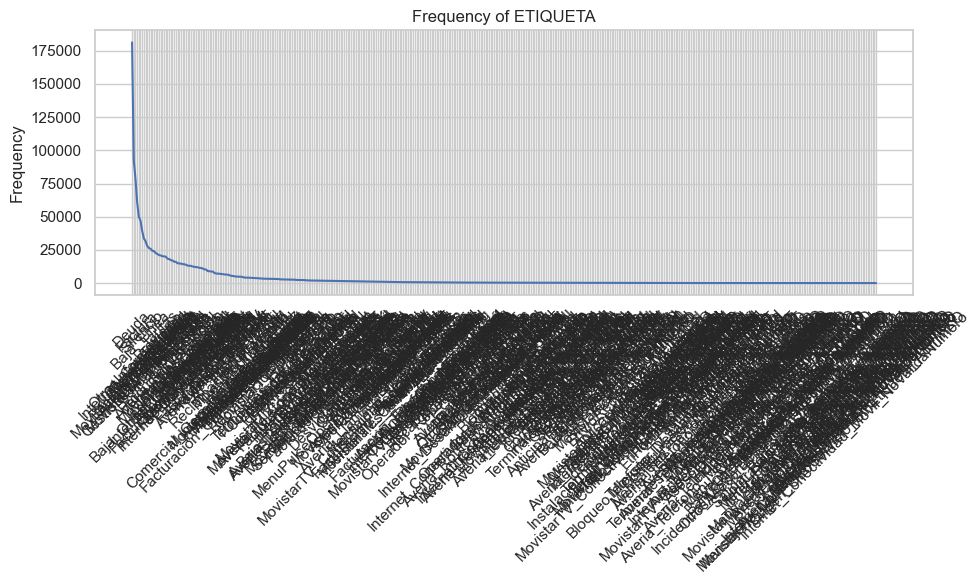

In [11]:
# Valores unicos de la columna ETIQUETA
print(mayo2024_todo['ETIQUETA'].unique())

df = mayo2024_todo['ETIQUETA'].value_counts().reset_index()
df.columns = ['ETIQUETA', 'Frequency']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ETIQUETA', y='Frequency', legend=False)
plt.xticks(rotation=45)
plt.title('Frequency of ETIQUETA')
plt.xlabel('')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

In [12]:
# Print count en mayo2024_todo de la ETIQUETA 'OtrasInformaciones'
print(mayo2024_todo[mayo2024_todo['ETIQUETA'] == 'OtrasInformaciones'].count())

FECHA                      50007
HORA                       50007
MARCACION                  50007
ANI                        50007
ANI_VALIDADO               50007
IDU                        50007
NEGOCIO                    50007
ETIQUETA                   50007
RESULTADO                  49832
DURACION                   50007
FILA_ID                    50007
TIMESTAMP                  50007
TRASCRIPCION_PA            50007
NOMBRE_PREGUNTA_ABIERTA    50007
SEG_MARKETING_VALIDADO     50007
NIF_VALIDADO               37757
VRID_LLAMADA               50007
ETIQUETA_ANTERIOR          50007
CLIENTE                    50007
SEGMENTO_VRU               50004
TRATAMIENTO                50007
PLATAFORMA                 45561
dtype: int64


# 2. Análisis Gestión de Pedidos (todo)

Para gestión de pedidos propongo hacer dos análisis siempre con la idea de que analicemos todo, el caso de uso está orientado SOLO a particulares (1004)
- Seleccionando las siguientes etiquetas en TODOS los Negocios (dataset mayo2024_todo):

    ### Etiquetas Gestión de pedidos:
    'Autoinstalacion_Zeleris'
    'OtrasInformaciones'
    'Reclamacion_factura'
    'GestionesAdministrativas'
    'Comercial_Fibra'
    'Provision'
    'Portabilidad'
    'Baja_OtrosProductosServicios'
    'Promocion'
    'Internet_Comercial'
    'MovistarTV_Provision'
    'TrasladoLinea'
    'Comercial_Fusion'
    'Permanencia'
    'SIM_Otras'
    'MovistarTV_NoCol'
    'LiberarTerminal'
    'Prosegur_Provision'
    'Recarga_NoCol'
    'MovistarCar_Provision'



In [13]:
# Dataframe Gestión de Pedidos
Gestion_Pedidos = mayo2024_todo[mayo2024_todo['ETIQUETA'].isin(['Autoinstalacion_Zeleris', 'Reclamacion_Factura', 'OtrasInformaciones', 'Reclamacion_factura', 'GestionesAdministrativas', 'Comercial_Fibra', 'Provision', 'Portabilidad', 'Baja_OtrosProductosServicios', 'Promocion', 'Internet_Comercial', 'MovistarTV_Provision', 'TrasladoLinea', 'Comercial_Fusion', 'Permanencia', 'SIM_Otras', 'MovistarTV_NoCol', 'LiberarTerminal', 'Prosegur_Provision', 'Recarga_NoCol', 'MovistarCar_Provision'])]
#Gestion_Pedidos.to_csv('data/Gestion_Pedidos.csv', index=False)

In [14]:
Gestion_Pedidos

,FECHA,HORA,MARCACION,ANI,ANI_VALIDADO,IDU,NEGOCIO,ETIQUETA,RESULTADO,DURACION,...,TRASCRIPCION_PA,NOMBRE_PREGUNTA_ABIERTA,SEG_MARKETING_VALIDADO,NIF_VALIDADO,VRID_LLAMADA,ETIQUETA_ANTERIOR,CLIENTE,SEGMENTO_VRU,TRATAMIENTO,PLATAFORMA
14,2024-05-05 00:00:00.000,11:27:06,1004,618875981,618875981,30002422501714901184,1004,Comercial_Fibra,Transfer Directa a Agente OK,25,...,Conectar segunda fibra,Pregunta Abierta Castellano,74KB,00003786922H,012M15M7A8A6T4IJQ37P62LAES07OQ11,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
16,2024-05-05 00:00:00.000,11:27:59,1004,680778958,680778958,30002028001714901232,1004,Comercial_Fusion,Transfer Directa a Agente OK,12,...,Fusión,Pregunta Abierta Castellano,74GB,00042231784N,018U1UM7A8A6T4CAQ77P62LAES07PM9T,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
20,2024-05-05 00:00:00.000,11:29:09,1004,605656658,605656658,30003328751714901280,1004,Comercial_Fibra,Transfer Directa a Agente OK,15,...,Contratación fibra,Pregunta Abierta Castellano,ND,NaN,00QAVCIL6KA85DVAJ2B8A2LAES07AS77,Pregunta_Abierta,TELCO,NM,TRANSF,NaN
32,2024-05-05 00:00:00.000,11:30:35,1004,650897731,650897731,30003192671714901391,1004,Reclamacion_Factura,Transfer Directa a Agente OK,14,...,Es una reclamación de una factura,Pregunta Abierta Castellano,74KB,00000385144D,00F6QLMJSSAB9FP8K6AOA2LAES06FQB5,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
41,2024-05-05 00:00:00.000,11:27:38,1004,606664496,606664496,30002027671714901208,1004,Comercial_Fibra,Transfer Directa a Agente OK,21,...,Tenemos una una instalación de fibra en una se...,Pregunta Abierta Castellano,ND,000B60000163,018U1UM7A8A6T4CAQ77P62LAES07PM9N,Pregunta_Abierta,TELCO,AU,TRANSF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616201,2024-05-27 00:00:00.000,12:27:55,1004,648960886,648960886,30003291781716805606,1004,TrasladoLinea,Transfer Directa a Agente OK,24,...,Segunda residencia/Cambio de segunda residencia,Pregunta Abierta Castellano,74KB,000Y6058633X,00QAVCIL6KA85DVAJ2B8A2LAES07M9GF,Reformulacion,TELCO,CO,TRANSF,1.0
1616203,2024-05-27 00:00:00.000,12:26:34,1004,943350514,943350514,30001236961716805535,1004,GestionesAdministrativas,Transfer Directa a Agente OK,28,...,Intentar modificar mi contrato con Movistar,Pregunta Abierta Castellano,74GB,00034081113N,005I21KE0CA8N5NBIU6OA2LAES07LOTH,Pregunta_Abierta,TELCO,FI,TRANSF,1.0
1616228,2024-05-27 00:00:00.000,12:26:55,1004,663332721,663332721,30004045371716805557,1004,Baja_OtrosProductosServicios,Transfer Directa a Agente OK,44,...,Anular suscripción/otro producto,Pregunta Abierta Castellano,34BR,00005158225S,00K7G03DSKA6R5R1I4COA2LAES08CBGD,Baja_Desambig,TELCO,CO,TRANSF,1.0
1616230,2024-05-27 00:00:00.000,12:26:36,1004,674442147,674442147,30003578961716805534,1004,Provision,Transfer Directa a Agente OK,63,...,Problema con un pedido/movistar,Pregunta Abierta Castellano,74KB,00035978493F,00QAVCIL6KA85DVAJ2B8A2LAES07M9EN,Provision_Desambig,TELCO,CO,LSMSTR,1.0


ETIQUETA
OtrasInformaciones              50007
Reclamacion_Factura             33624
GestionesAdministrativas        31532
Comercial_Fibra                 24334
Provision                       21066
Portabilidad                    20189
Baja_OtrosProductosServicios    19884
Promocion                       14138
Internet_Comercial              13822
MovistarTV_Provision            11436
TrasladoLinea                   10288
Comercial_Fusion                 6297
Permanencia                      3669
SIM_Otras                        2707
MovistarTV_NoCol                  651
LiberarTerminal                   643
Prosegur_Provision                192
Autoinstalacion_Zeleris           187
Recarga_NoCol                     142
MovistarCar_Provision              37
Name: count, dtype: int64


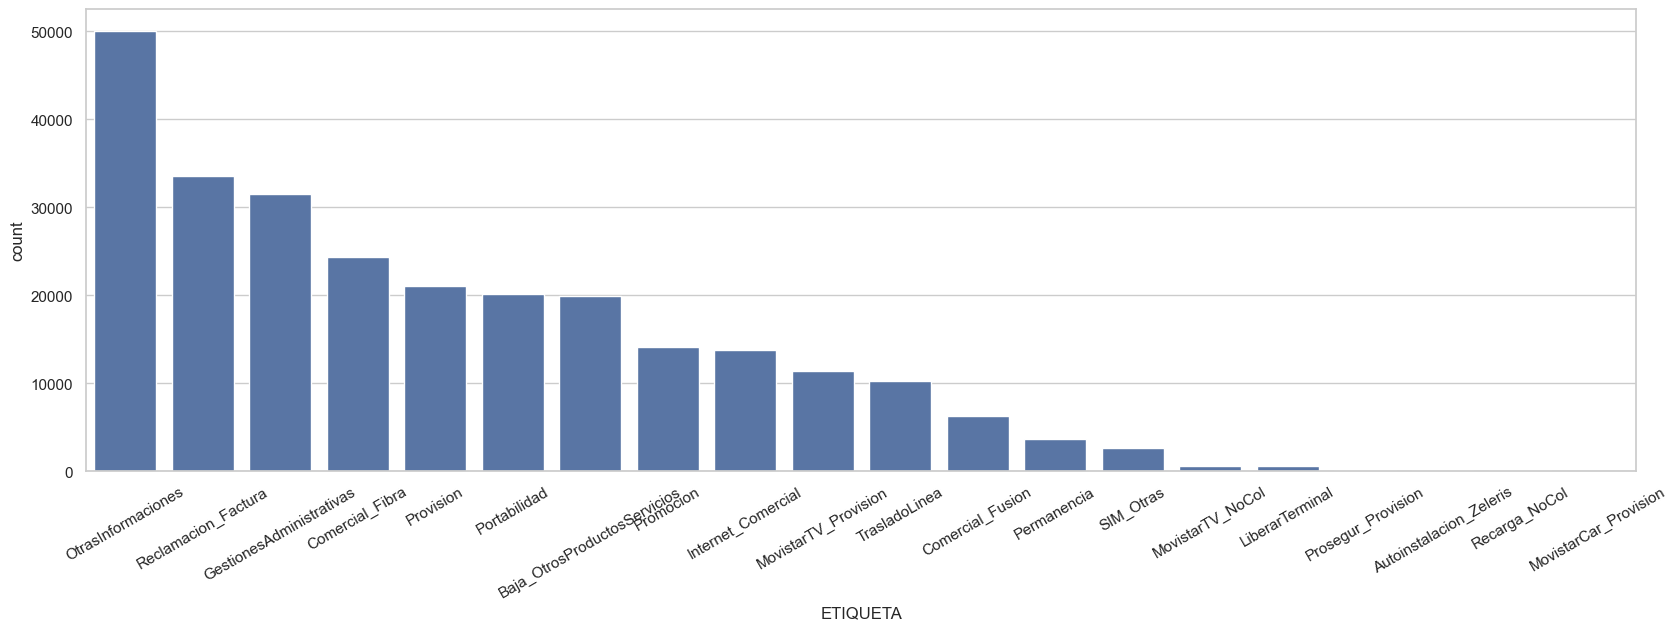

In [15]:
# Count values in column ETIQUETA
print(Gestion_Pedidos['ETIQUETA'].value_counts())

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(x='ETIQUETA', data=Gestion_Pedidos, order=Gestion_Pedidos['ETIQUETA'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [16]:
Gestion_Pedidos

,FECHA,HORA,MARCACION,ANI,ANI_VALIDADO,IDU,NEGOCIO,ETIQUETA,RESULTADO,DURACION,...,TRASCRIPCION_PA,NOMBRE_PREGUNTA_ABIERTA,SEG_MARKETING_VALIDADO,NIF_VALIDADO,VRID_LLAMADA,ETIQUETA_ANTERIOR,CLIENTE,SEGMENTO_VRU,TRATAMIENTO,PLATAFORMA
14,2024-05-05 00:00:00.000,11:27:06,1004,618875981,618875981,30002422501714901184,1004,Comercial_Fibra,Transfer Directa a Agente OK,25,...,Conectar segunda fibra,Pregunta Abierta Castellano,74KB,00003786922H,012M15M7A8A6T4IJQ37P62LAES07OQ11,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
16,2024-05-05 00:00:00.000,11:27:59,1004,680778958,680778958,30002028001714901232,1004,Comercial_Fusion,Transfer Directa a Agente OK,12,...,Fusión,Pregunta Abierta Castellano,74GB,00042231784N,018U1UM7A8A6T4CAQ77P62LAES07PM9T,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
20,2024-05-05 00:00:00.000,11:29:09,1004,605656658,605656658,30003328751714901280,1004,Comercial_Fibra,Transfer Directa a Agente OK,15,...,Contratación fibra,Pregunta Abierta Castellano,ND,NaN,00QAVCIL6KA85DVAJ2B8A2LAES07AS77,Pregunta_Abierta,TELCO,NM,TRANSF,NaN
32,2024-05-05 00:00:00.000,11:30:35,1004,650897731,650897731,30003192671714901391,1004,Reclamacion_Factura,Transfer Directa a Agente OK,14,...,Es una reclamación de una factura,Pregunta Abierta Castellano,74KB,00000385144D,00F6QLMJSSAB9FP8K6AOA2LAES06FQB5,Pregunta_Abierta,TELCO,CO,TRANSF,NaN
41,2024-05-05 00:00:00.000,11:27:38,1004,606664496,606664496,30002027671714901208,1004,Comercial_Fibra,Transfer Directa a Agente OK,21,...,Tenemos una una instalación de fibra en una se...,Pregunta Abierta Castellano,ND,000B60000163,018U1UM7A8A6T4CAQ77P62LAES07PM9N,Pregunta_Abierta,TELCO,AU,TRANSF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616201,2024-05-27 00:00:00.000,12:27:55,1004,648960886,648960886,30003291781716805606,1004,TrasladoLinea,Transfer Directa a Agente OK,24,...,Segunda residencia/Cambio de segunda residencia,Pregunta Abierta Castellano,74KB,000Y6058633X,00QAVCIL6KA85DVAJ2B8A2LAES07M9GF,Reformulacion,TELCO,CO,TRANSF,1.0
1616203,2024-05-27 00:00:00.000,12:26:34,1004,943350514,943350514,30001236961716805535,1004,GestionesAdministrativas,Transfer Directa a Agente OK,28,...,Intentar modificar mi contrato con Movistar,Pregunta Abierta Castellano,74GB,00034081113N,005I21KE0CA8N5NBIU6OA2LAES07LOTH,Pregunta_Abierta,TELCO,FI,TRANSF,1.0
1616228,2024-05-27 00:00:00.000,12:26:55,1004,663332721,663332721,30004045371716805557,1004,Baja_OtrosProductosServicios,Transfer Directa a Agente OK,44,...,Anular suscripción/otro producto,Pregunta Abierta Castellano,34BR,00005158225S,00K7G03DSKA6R5R1I4COA2LAES08CBGD,Baja_Desambig,TELCO,CO,TRANSF,1.0
1616230,2024-05-27 00:00:00.000,12:26:36,1004,674442147,674442147,30003578961716805534,1004,Provision,Transfer Directa a Agente OK,63,...,Problema con un pedido/movistar,Pregunta Abierta Castellano,74KB,00035978493F,00QAVCIL6KA85DVAJ2B8A2LAES07M9EN,Provision_Desambig,TELCO,CO,LSMSTR,1.0


RESULTADO
Transfer Directa a Agente OK             257424
No Reconocida en PA (Transfer Agente)      5529
No Colabora en Menú (Transfer Agente)       752
Colgada en Transferencia                    196
Transfer desde Autogestion OK               187
Locucion                                    135
Colgadas por Servicio                        36
Colgada en Menu Desambiguacion               10
Autogestion                                   4
Name: count, dtype: int64


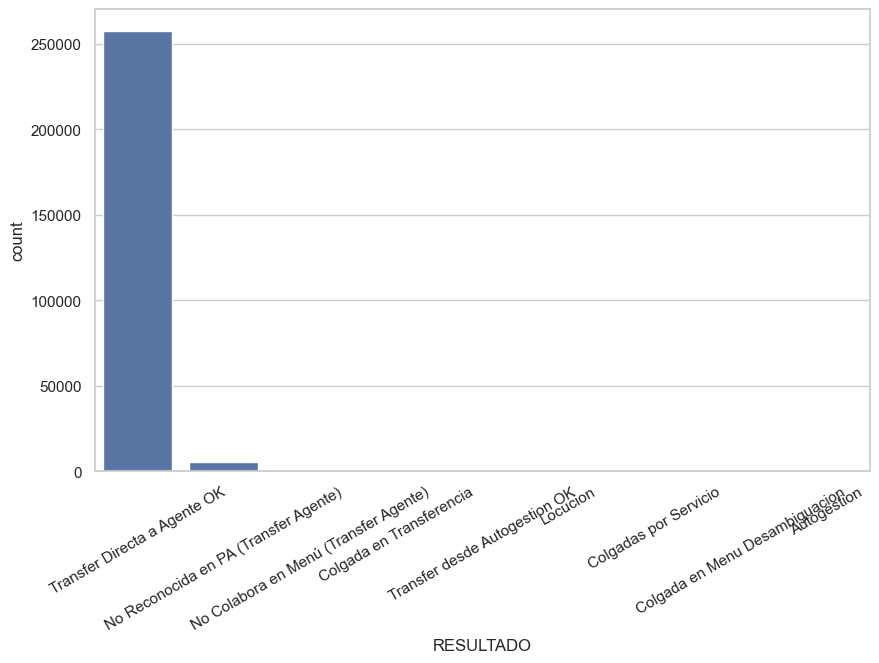

In [17]:
# Count values in column ETIQUETA
print(Gestion_Pedidos['RESULTADO'].value_counts())

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='RESULTADO', data=Gestion_Pedidos, order=Gestion_Pedidos['RESULTADO'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

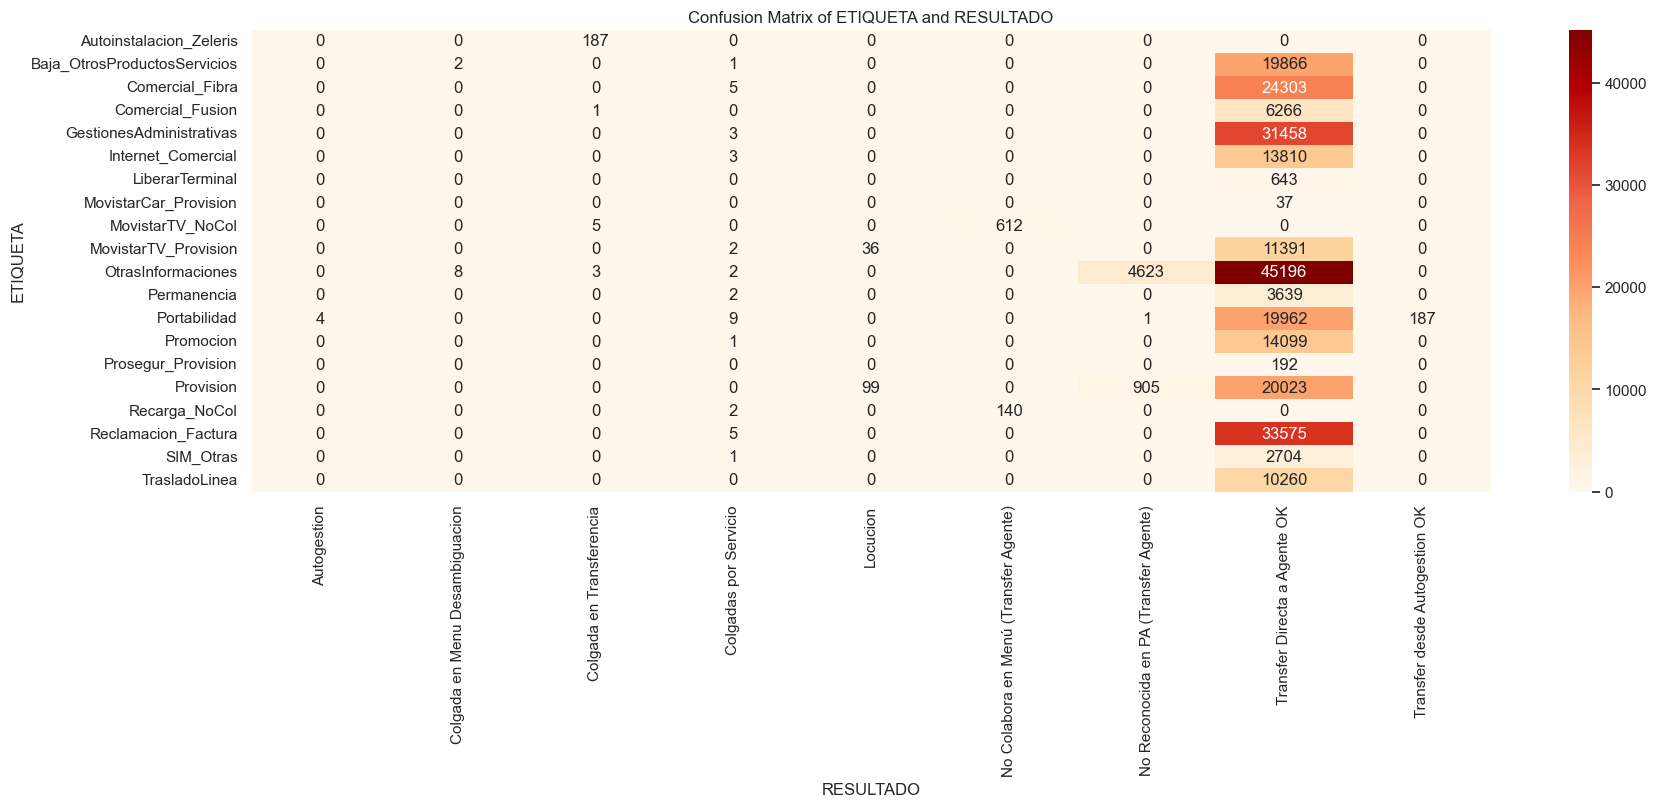

In [18]:
etiqueta_result_df = Gestion_Pedidos[["ETIQUETA", "RESULTADO"]]

etiqueta_result_df = etiqueta_result_df.groupby(['ETIQUETA', 'RESULTADO']).size().reset_index(name='Count')
etiqueta_result_df

confusion_matrix = etiqueta_result_df.pivot(index='ETIQUETA', columns='RESULTADO', values='Count').fillna(0)

# Plot the confusion matrix
plt.figure(figsize=(20, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='OrRd')
plt.title('Confusion Matrix of ETIQUETA and RESULTADO')
plt.xlabel('RESULTADO')
plt.ylabel('ETIQUETA')
plt.show()

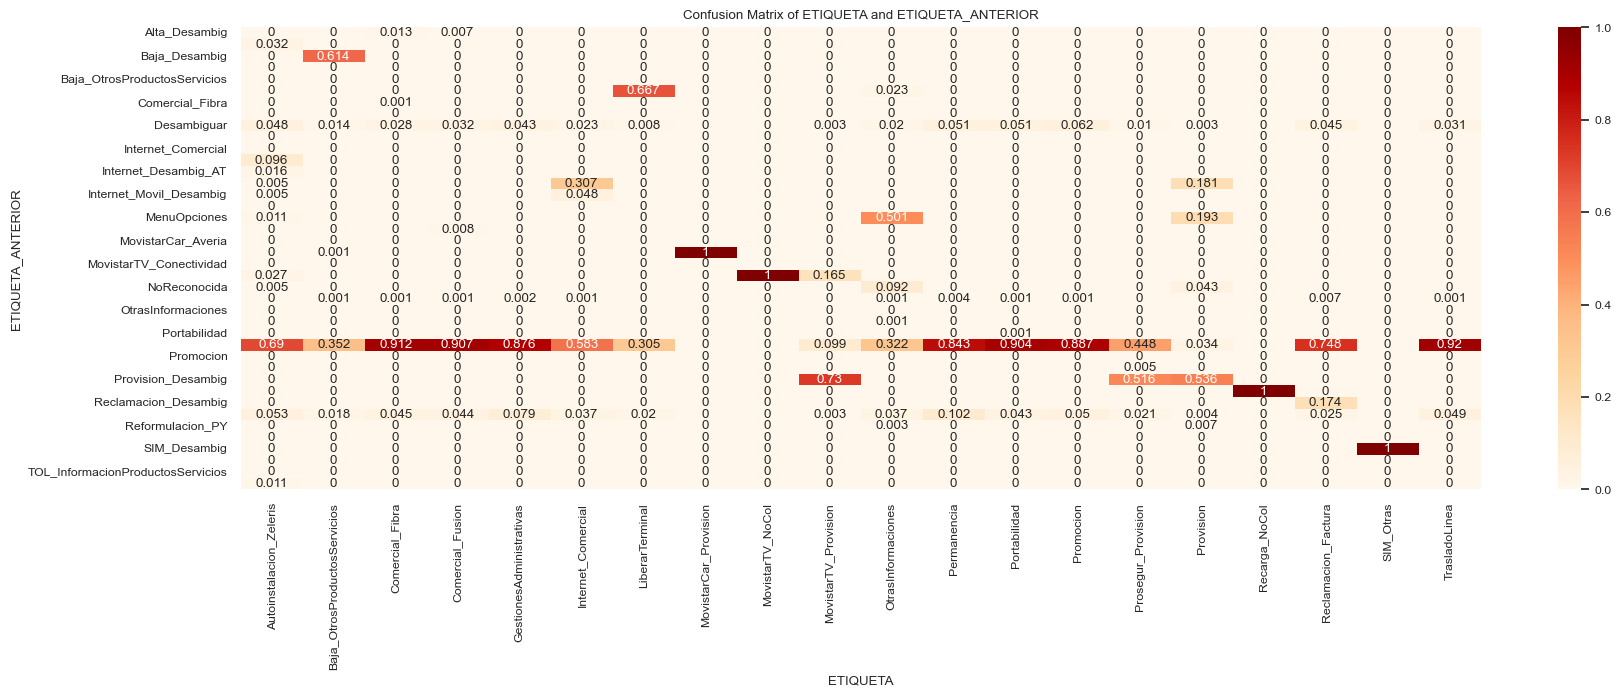

In [19]:
etiqueta_result_df = Gestion_Pedidos[["ETIQUETA", "ETIQUETA_ANTERIOR"]]

etiqueta_result_df = etiqueta_result_df.groupby(["ETIQUETA", "ETIQUETA_ANTERIOR"]).size().reset_index(name='Count')
etiqueta_result_df

confusion_matrix = etiqueta_result_df.pivot(index='ETIQUETA_ANTERIOR', columns='ETIQUETA', values='Count').fillna(0)

# Normalize so that each column sums to 1
confusion_matrix = confusion_matrix.div(confusion_matrix.sum(axis=0), axis=1)

# Limit to 3 decimals
confusion_matrix = confusion_matrix.round(3)

# Plot the confusion matrix and reduce the size of the labels
plt.figure(figsize=(20, 6))
sns.set_theme(font_scale=0.8)
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='OrRd')
plt.title('Confusion Matrix of ETIQUETA and ETIQUETA_ANTERIOR')
plt.xlabel('ETIQUETA')
plt.ylabel('ETIQUETA_ANTERIOR')
plt.show()


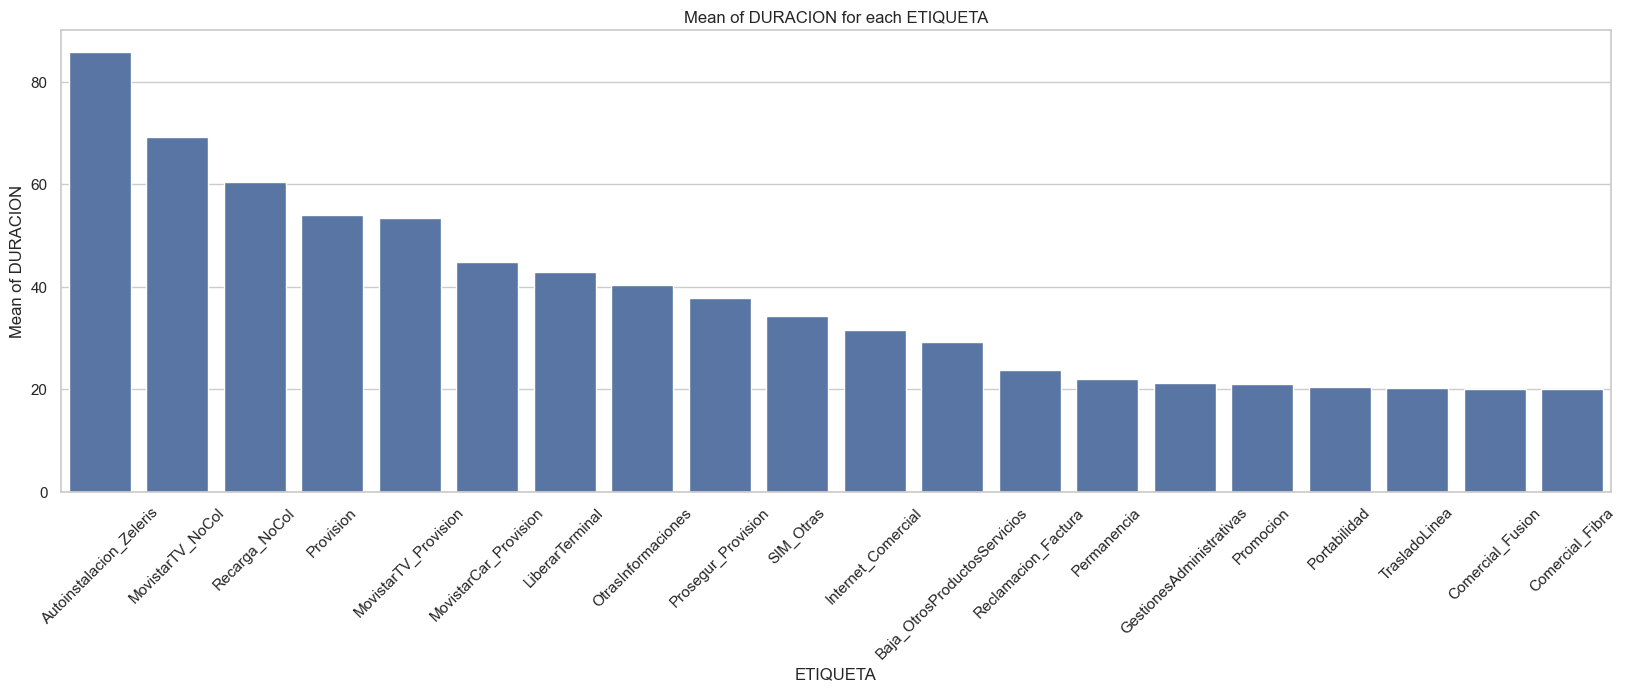

In [20]:
# Relate etiqueta and duracion

# Obtain the mean of the column DURACION in for each ETIQUETA
duracion_etiqueta = Gestion_Pedidos.groupby('ETIQUETA')['DURACION'].mean().reset_index()
duracion_etiqueta

# Order the values by the mean of DURACION
duracion_etiqueta = duracion_etiqueta.sort_values(by='DURACION', ascending=False)

# Plot the mean of the column DURACION for each ETIQUETA
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='ETIQUETA', y='DURACION', data=duracion_etiqueta)
plt.xticks(rotation=45)
plt.title('Mean of DURACION for each ETIQUETA')
plt.xlabel('ETIQUETA')
plt.ylabel('Mean of DURACION')
plt.show()


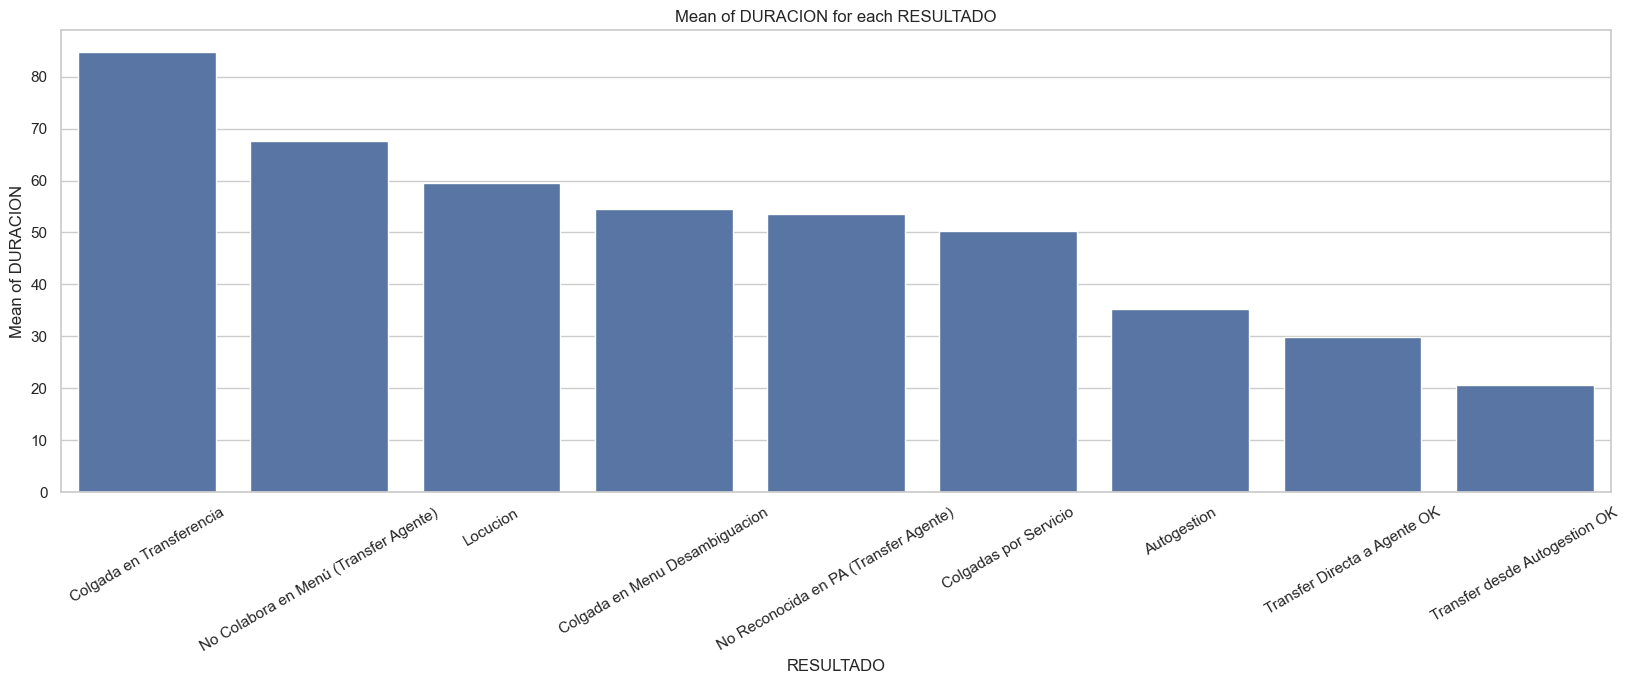

In [21]:
# Relate resultado and duracion

# Obtain the mean of the column DURACION in for each ETIQUETA
duracion_etiqueta = Gestion_Pedidos.groupby('RESULTADO')['DURACION'].mean().reset_index()
duracion_etiqueta

# Order the values by the mean of DURACION
duracion_etiqueta = duracion_etiqueta.sort_values(by='DURACION', ascending=False)

# Plot the mean of the column DURACION for each ETIQUETA
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='RESULTADO', y='DURACION', data=duracion_etiqueta)
plt.xticks(rotation=30)
plt.title('Mean of DURACION for each RESULTADO')
plt.xlabel('RESULTADO')
plt.ylabel('Mean of DURACION')
plt.show()

C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\2802180300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gestion_Pedidos['TRASCRIPCION_PA'] = Gestion_Pedidos['TRASCRIPCION_PA'].astype(str)
C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\2802180300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gestion_Pedidos['Length'] = Gestion_Pedidos['TRASCRIPCION_PA'].apply(len)


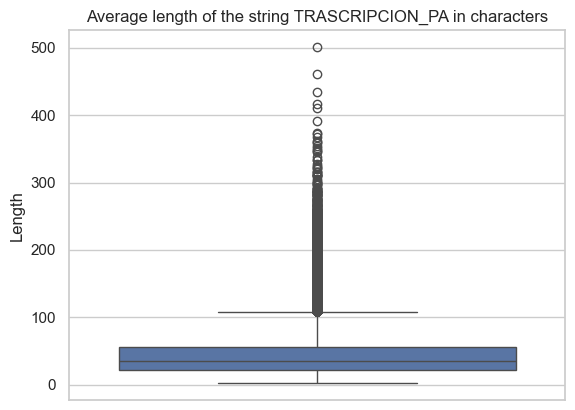

C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\2802180300.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gestion_Pedidos['Words'] = Gestion_Pedidos['TRASCRIPCION_PA'].apply(lambda x: len(x.split()))


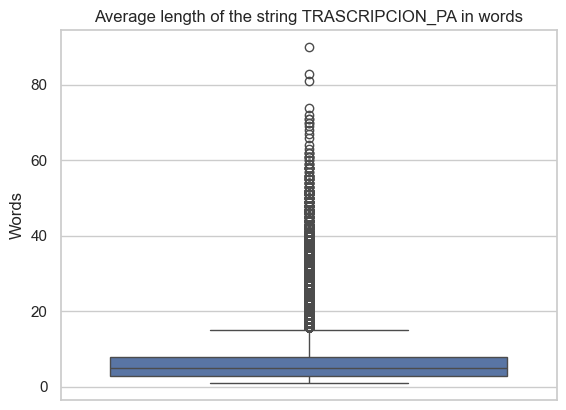

In [22]:
# Transform the column TRASCRIPCION_PA to string
Gestion_Pedidos['TRASCRIPCION_PA'] = Gestion_Pedidos['TRASCRIPCION_PA'].astype(str)

# Boxplot with average length of the string TRASCRIPCION_PA in characters
Gestion_Pedidos['Length'] = Gestion_Pedidos['TRASCRIPCION_PA'].apply(len)
sns.boxplot(y='Length', data=Gestion_Pedidos)
plt.title('Average length of the string TRASCRIPCION_PA in characters')
plt.show()

# Boxplot with average length of the string TRASCRIPCION_PA in words
Gestion_Pedidos['Words'] = Gestion_Pedidos['TRASCRIPCION_PA'].apply(lambda x: len(x.split()))
sns.boxplot(y='Words', data=Gestion_Pedidos)
plt.title('Average length of the string TRASCRIPCION_PA in words')
plt.show()


In [23]:
# Dataframe with average length of the string TRASCRIPCION_PA and duration DURACION for each ETIQUETA 
duracion_etiqueta = Gestion_Pedidos.groupby('ETIQUETA')[['DURACION', 'Length', 'Words']].mean().reset_index()
duracion_etiqueta

,ETIQUETA,DURACION,Length,Words
0,Autoinstalacion_Zeleris,85.844920,37.951872,6.176471
1,Baja_OtrosProductosServicios,29.292597,42.332026,6.297777
2,Comercial_Fibra,20.042204,31.184639,5.253514
3,Comercial_Fusion,20.132603,29.822138,4.799746
4,GestionesAdministrativas,21.233223,34.496036,5.484746
5,Internet_Comercial,31.522139,50.241933,7.150846
6,LiberarTerminal,42.833593,48.164852,7.122862
7,MovistarCar_Provision,44.810811,54.000000,8.243243
8,MovistarTV_NoCol,69.145929,26.417819,4.070661
9,MovistarTV_Provision,53.470269,66.659671,9.673487


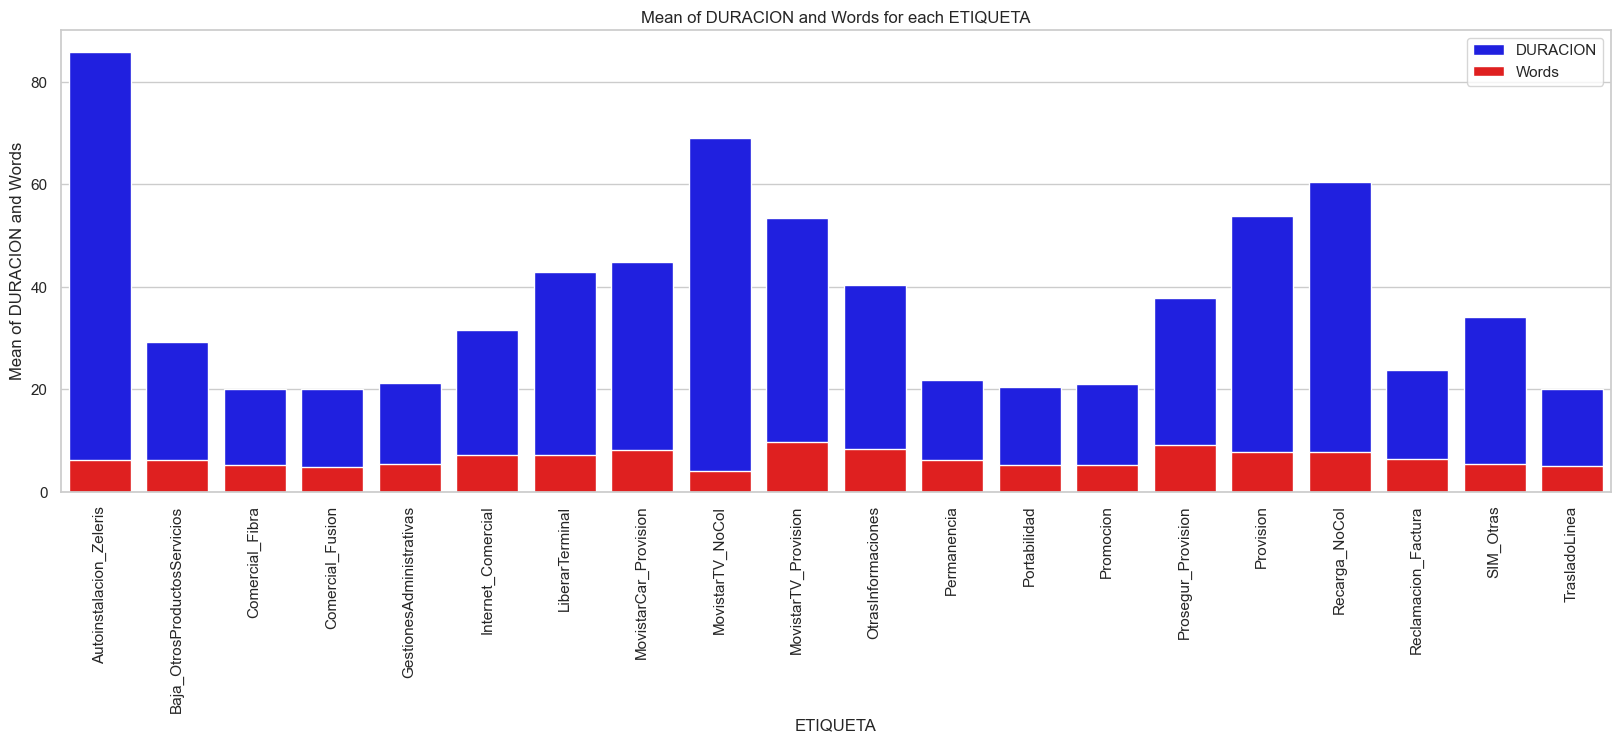

In [24]:
# Plot Duracion and Words for each ETIQUETA
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='ETIQUETA', y='DURACION', data=duracion_etiqueta, color='blue', label='DURACION')
sns.barplot(x='ETIQUETA', y='Words', data=duracion_etiqueta, color='red', label='Words')
plt.xticks(rotation=90)
plt.title('Mean of DURACION and Words for each ETIQUETA')
plt.xlabel('ETIQUETA')
plt.ylabel('Mean of DURACION and Words')
plt.legend()
plt.show()

In [25]:
# Dataframe with average length of the string TRASCRIPCION_PA and duration DURACION for each RESULTADO 
duracion_etiqueta = Gestion_Pedidos.groupby('RESULTADO')[['DURACION', 'Length', 'Words']].mean().reset_index()
duracion_etiqueta

,RESULTADO,DURACION,Length,Words
0,Autogestion,35.250000,14.250000,1.500000
1,Colgada en Menu Desambiguacion,54.600000,41.600000,5.600000
2,Colgada en Transferencia,84.688776,38.051020,6.234694
3,Colgadas por Servicio,50.222222,34.055556,4.972222
4,Locucion,59.585185,55.733333,8.103704
5,No Colabora en Menú (Transfer Agente),67.628989,29.456117,4.726064
6,No Reconocida en PA (Transfer Agente),53.469705,30.020619,4.549466
7,Transfer Directa a Agente OK,29.804871,43.803829,6.675228
8,Transfer desde Autogestion OK,20.609626,30.256684,4.347594


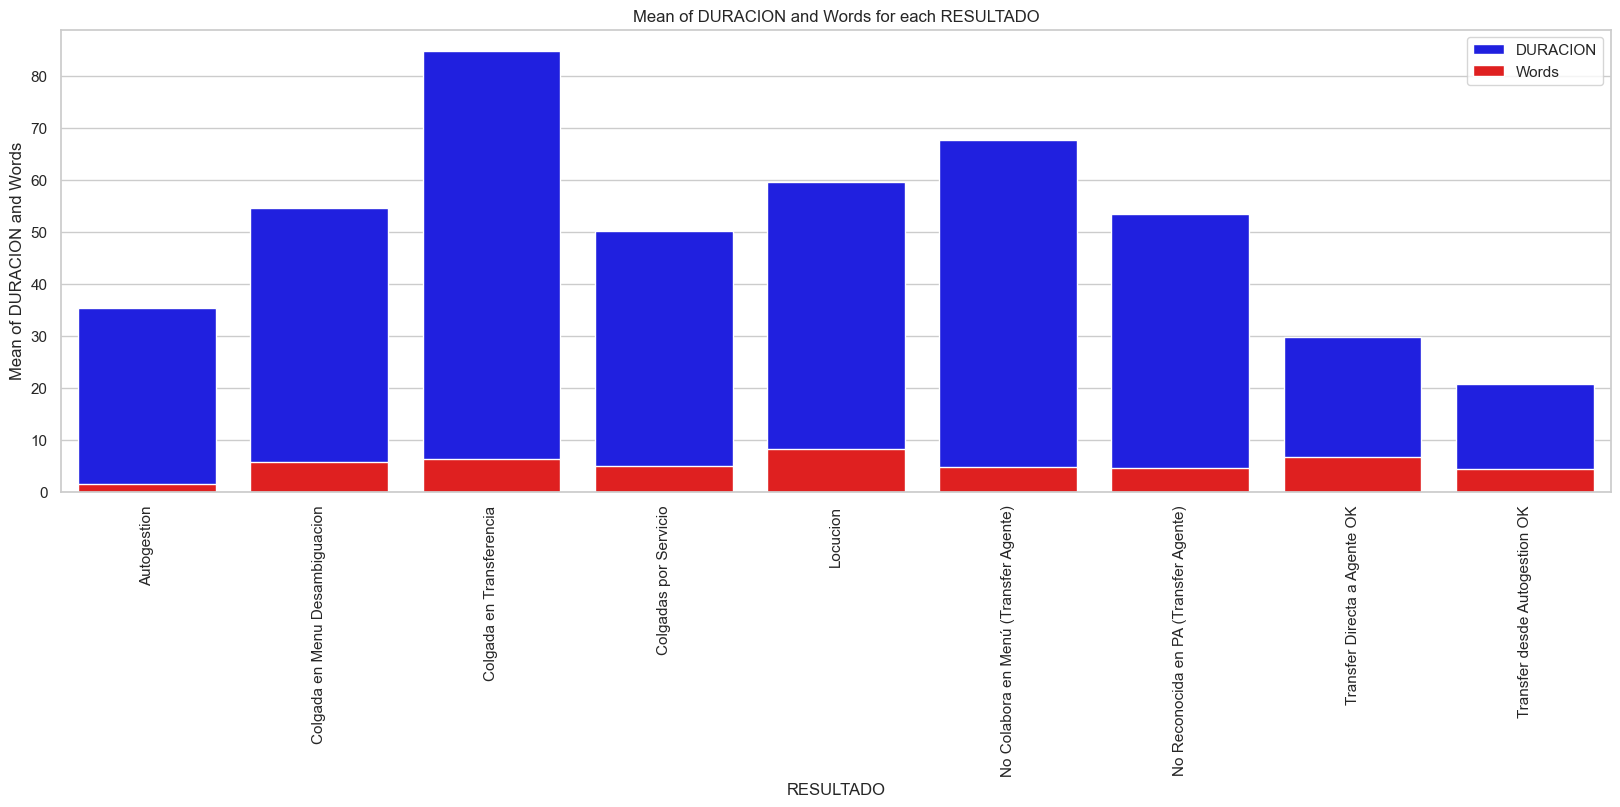

In [26]:
# Plot Duracion and Words for each RESULTADO
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='RESULTADO', y='DURACION', data=duracion_etiqueta, color='blue', label='DURACION')
sns.barplot(x='RESULTADO', y='Words', data=duracion_etiqueta, color='red', label='Words')
plt.xticks(rotation=90)
plt.title('Mean of DURACION and Words for each RESULTADO')
plt.xlabel('RESULTADO')
plt.ylabel('Mean of DURACION and Words')
plt.legend()
plt.show()

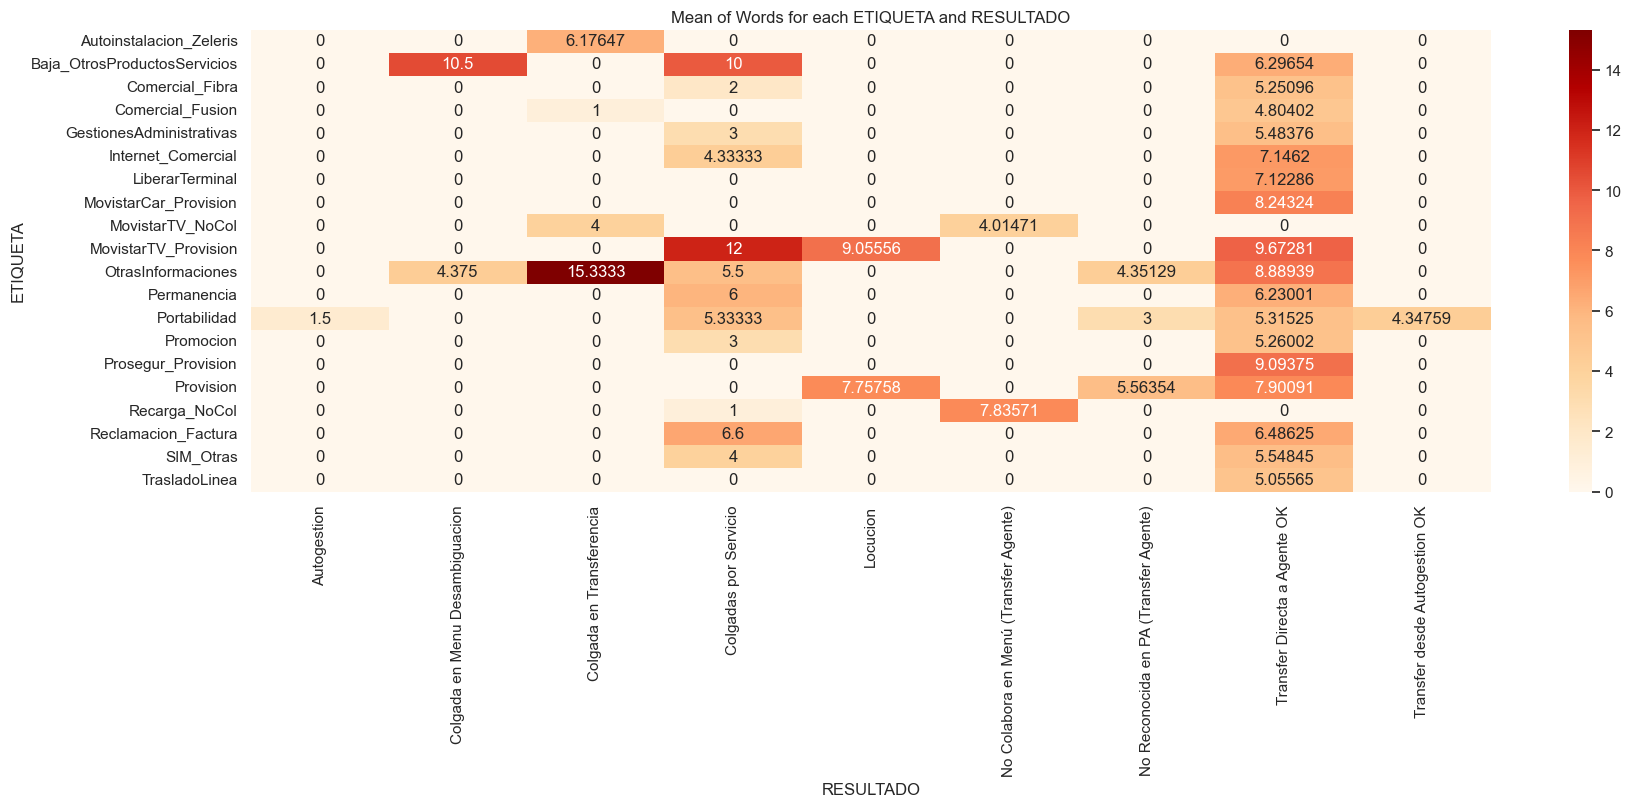

In [27]:
# Dataframe with average length of the string TRASCRIPCION_PA for each ETIQUETA and RESULTADO
duracion_etiqueta = Gestion_Pedidos.groupby(['ETIQUETA', 'RESULTADO'])['Words'].mean().reset_index()

duracion_etiqueta = duracion_etiqueta.sort_values(by='Words', ascending=False)

# Plot in heatmap
confusion_matrix = duracion_etiqueta.pivot(index='ETIQUETA', columns='RESULTADO', values='Words').fillna(0)

plt.figure(figsize=(20, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='OrRd')
plt.title('Mean of Words for each ETIQUETA and RESULTADO')
plt.xlabel('RESULTADO')
plt.ylabel('ETIQUETA')
plt.show()

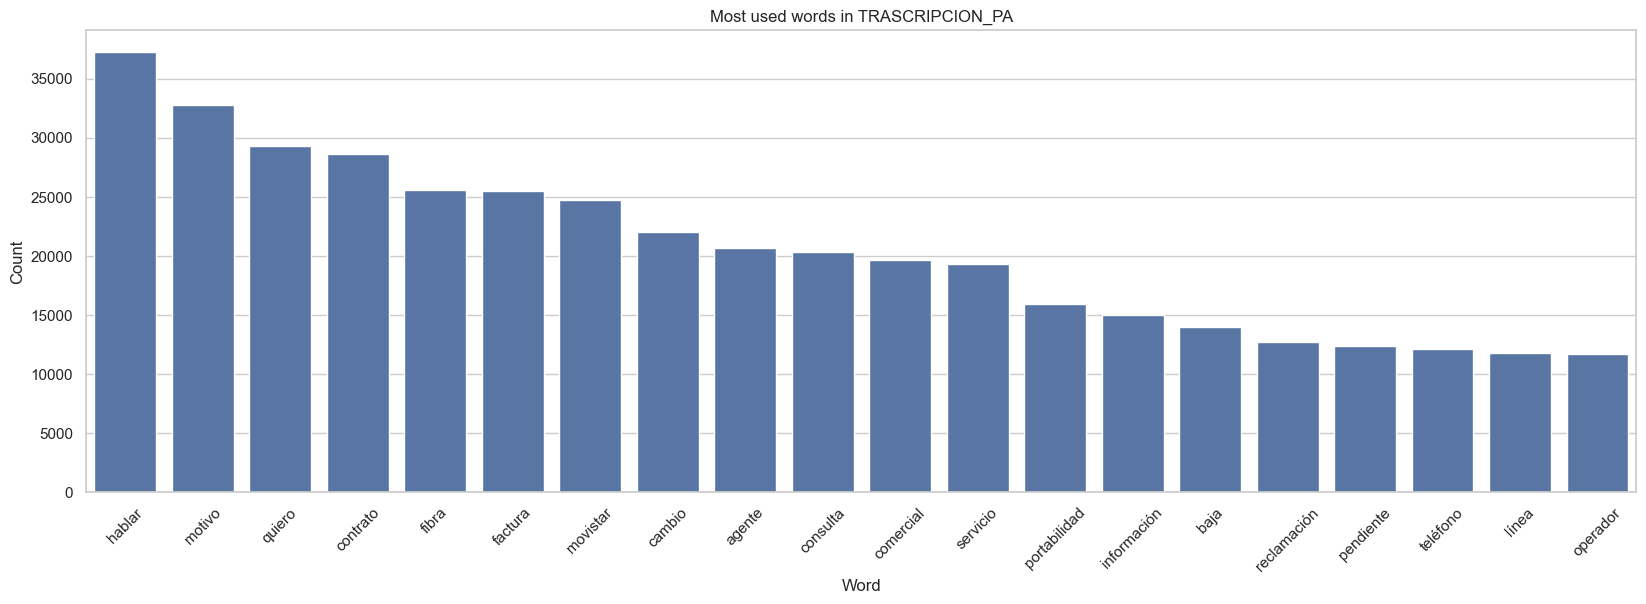

In [28]:
# Obtain the most used words in TRANSCRIPCION_PA

# Import the necessary library
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit and transform the column TRANSCRIPCION_PA
count_data = count_vectorizer.fit_transform(Gestion_Pedidos['TRASCRIPCION_PA'].values.astype('U'))

# Create a DataFrame with the words and their count
words = count_vectorizer.get_feature_names_out()
words_count = count_data.toarray().sum(axis=0)
words_df = pd.DataFrame({'Word': words, 'Count': words_count})

# Remove common words in Spanish
words_df = words_df[~words_df['Word'].isin(['no', 'otro', 'mi','de', 'la', 'el', 'en', 'que', 'los', 'las', 'del', 'un', 'con', 'para', 'por', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'o', 'pero', 'sus', 'le', 'ha', 'me', 'si', 'sin', 'sobre', 'este', 'ya', 'entre', 'cuando', 'todo', 'esta', 'ser', 'son', 'dos', 'también'])]

# Order the values by the count of the words
words_df = words_df.sort_values(by='Count', ascending=False)

# Plot the most used words
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='Word', y='Count', data=words_df.head(20))
plt.xticks(rotation=45)
plt.title('Most used words in TRASCRIPCION_PA')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\1610996258.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Gestion_Pedidos_subset = Gestion_Pedidos.groupby('ETIQUETA').apply(lambda x: x.sample(frac=0.2)).reset_index(drop=True)
100%|██████████| 20/20 [00:03<00:00,  6.05it/s]


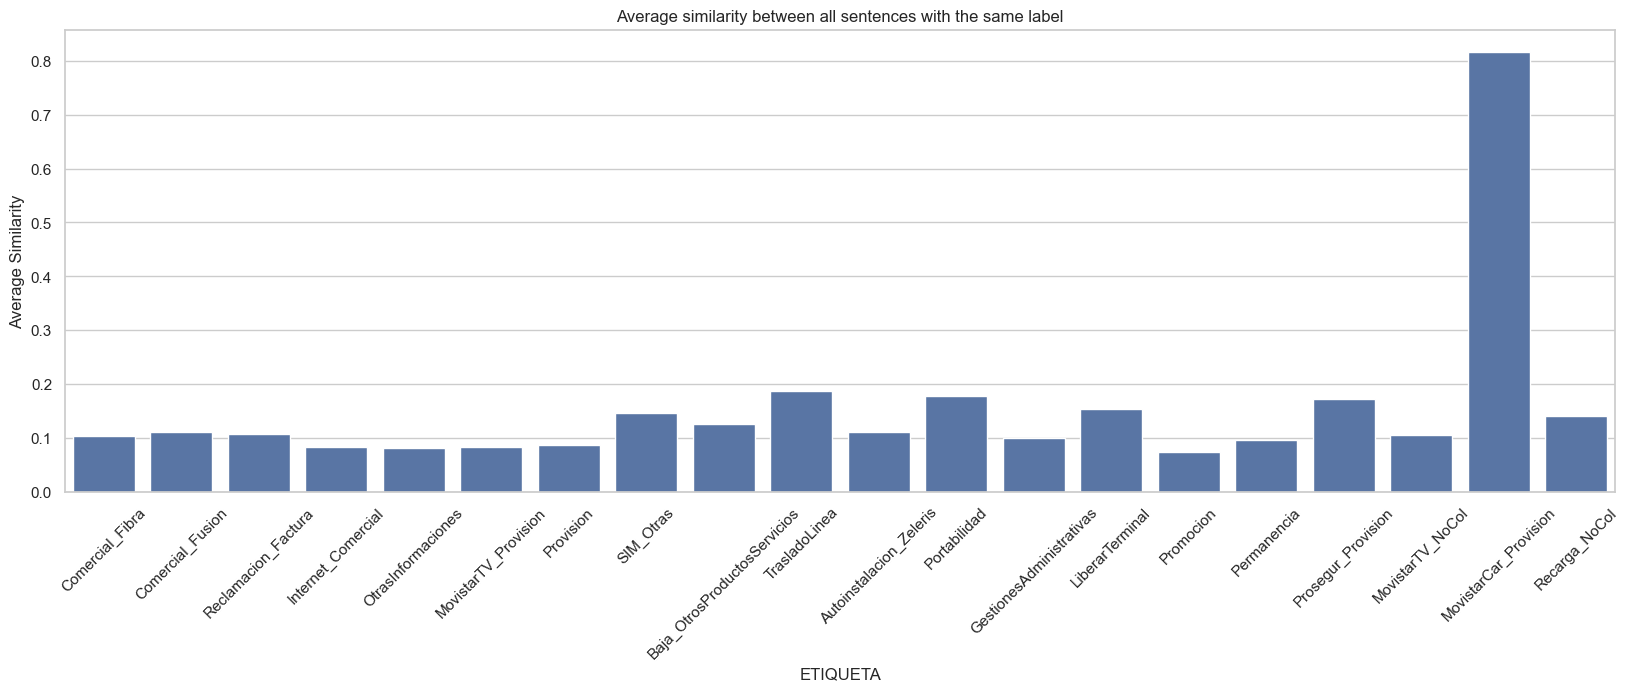

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk
from tqdm import tqdm

# Obtain a subset of the whole dataframe with the columns ETIQUETA and TRASCRIPCION_PA and 20% of the rows, preserving distribution of ETIQUETA
Gestion_Pedidos_subset = Gestion_Pedidos.groupby('ETIQUETA').apply(lambda x: x.sample(frac=0.2)).reset_index(drop=True)


Gestion_Pedidos_subset['TOKENIZED_TRASCRIPCION'] = Gestion_Pedidos_subset['TRASCRIPCION_PA'].apply(word_tokenize)

# Calculate similarity between sentences with the same label
def calculate_similarities(df):
    similarities = {}

    for label in tqdm(Gestion_Pedidos['ETIQUETA'].unique()):
        subset = df[df['ETIQUETA'] == label].reset_index(drop=True)
        sentences = subset['TRASCRIPCION_PA'].tolist()

        if len(sentences) > 1:
            vectorizer = TfidfVectorizer().fit_transform(sentences)
            similarity_matrix = cosine_similarity(vectorizer)

            similarities[label] = similarity_matrix
        else:
            similarities[label] = None

    return similarities

similarities = calculate_similarities(Gestion_Pedidos_subset)

# Calculate the average similarity between all sentences with the same label
def calculate_average_similarity(similarities):
    average_similarities = {}

    for label in similarities:
        if similarities[label] is not None:
            average_similarities[label] = similarities[label].mean()
        else:
            average_similarities[label] = None

    return average_similarities

average_similarities = calculate_average_similarity(similarities)

# Plot the average similarity between all sentences with the same label
average_similarities_df = pd.DataFrame(average_similarities.items(), columns=['ETIQUETA', 'Average Similarity'])
average_similarities_df = average_similarities_df.dropna()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='ETIQUETA', y='Average Similarity', data=average_similarities_df)
plt.xticks(rotation=90)
plt.title('Average similarity between all sentences with the same label')
plt.xlabel('ETIQUETA')
plt.ylabel('Average Similarity')
plt.show()



C:\Users\JP648WB\AppData\Local\Temp\ipykernel_19300\1240510276.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Gestion_Pedidos_subset = Gestion_Pedidos.groupby('RESULTADO').apply(lambda x: x.sample(frac=0.2)).reset_index(drop=True)
100%|██████████| 10/10 [00:53<00:00,  5.35s/it]


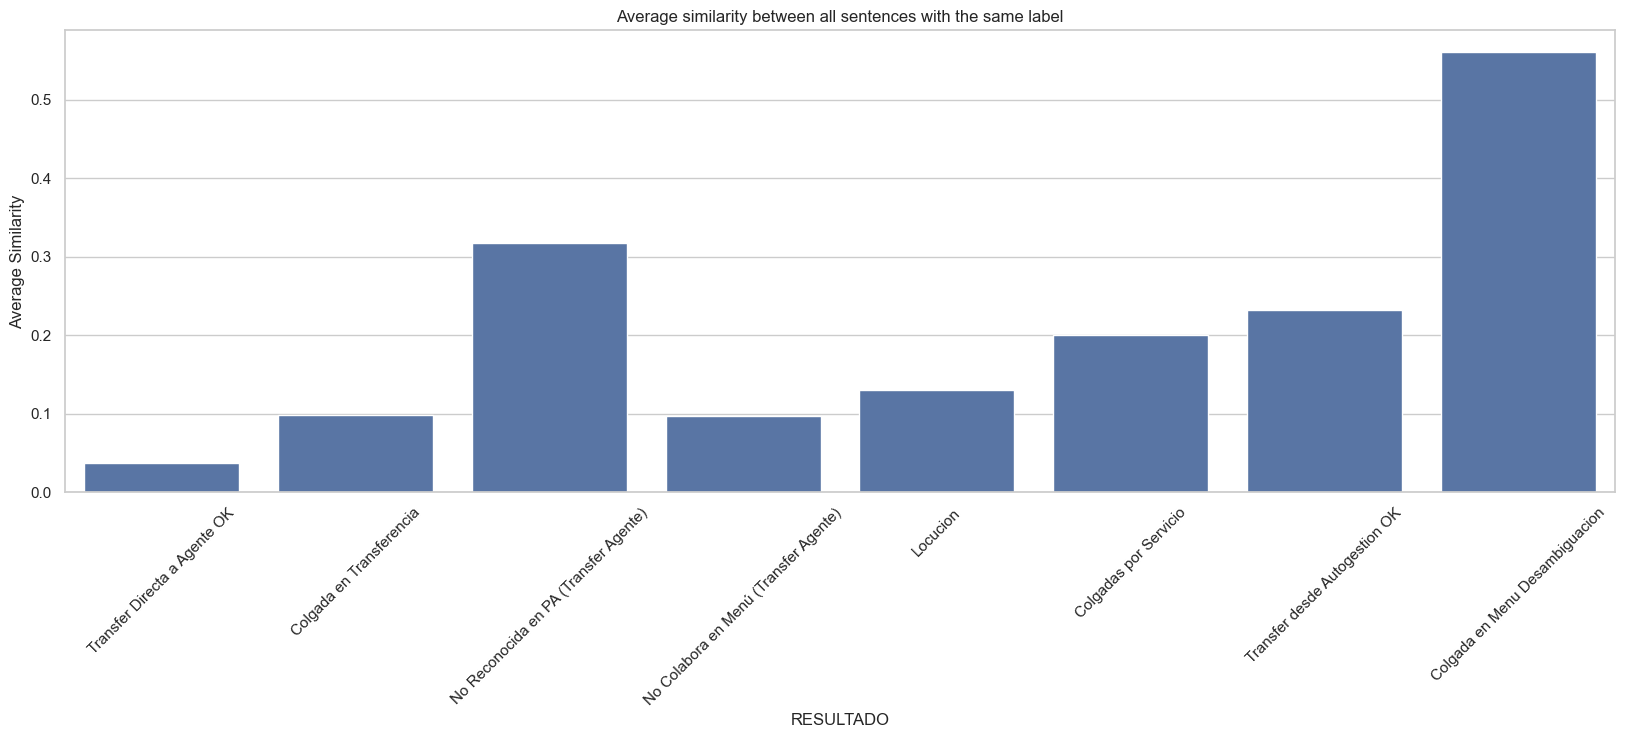

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk
from tqdm import tqdm

# Obtain a subset of the whole dataframe with the columns ETIQUETA and RESULTADO and 20% of the rows, preserving distribution of ETIQUETA
Gestion_Pedidos_subset = Gestion_Pedidos.groupby('RESULTADO').apply(lambda x: x.sample(frac=0.2)).reset_index(drop=True)


Gestion_Pedidos_subset['TOKENIZED_TRASCRIPCION'] = Gestion_Pedidos_subset['TRASCRIPCION_PA'].apply(word_tokenize)

# Calculate similarity between sentences with the same label
def calculate_similarities(df):
    similarities = {}

    for label in tqdm(Gestion_Pedidos['RESULTADO'].unique()):
        subset = df[df['RESULTADO'] == label].reset_index(drop=True)
        sentences = subset['TRASCRIPCION_PA'].tolist()

        if len(sentences) > 1:
            vectorizer = TfidfVectorizer().fit_transform(sentences)
            similarity_matrix = cosine_similarity(vectorizer)

            similarities[label] = similarity_matrix
        else:
            similarities[label] = None

    return similarities

similarities = calculate_similarities(Gestion_Pedidos_subset)

# Calculate the average similarity between all sentences with the same label
def calculate_average_similarity(similarities):
    average_similarities = {}

    for label in similarities:
        if similarities[label] is not None:
            average_similarities[label] = similarities[label].mean()
        else:
            average_similarities[label] = None

    return average_similarities

average_similarities = calculate_average_similarity(similarities)

# Plot the average similarity between all sentences with the same label
average_similarities_df = pd.DataFrame(average_similarities.items(), columns=['RESULTADO', 'Average Similarity'])
average_similarities_df = average_similarities_df.dropna()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='RESULTADO', y='Average Similarity', data=average_similarities_df)
plt.xticks(rotation=45)
plt.title('Average similarity between all sentences with the same label')
plt.xlabel('RESULTADO')
plt.ylabel('Average Similarity')
plt.show()

<span style="color: green;">
Próximos pasos:
Analiza dentro de este dataframe: 

- Analisis entre variables (como se relacionan las etiquetas con el final de la conversación o con la duración, por ejemplo, explóralo y lo vemos juntos cuando lo tengas)
- Conversaciones 

</span>

# 3. Análisis Gestión de pedidos (particulares) 1004

<span style="color: green;">
Haz los análisis también para el subsegmento de las mismas etiquetas en 1004 (solo las variables y volumetrías, las conversaciones son las mismas)
Me gustaría saber si hay una proporción similar entre lo que vemos en el total y lo que vemos solo en 1004

</span>

# 4. Análisis Averías (Empresas) 1002

<span style="color: green;">
Averías identificadas por Telefónica (comprobar si las tenemos)

</span>

'Antivirus'
'Aplicaciones_SO'
'Asesoramiento_MWI'
'Averia_Desambig_MFE'
'Averia_Desambiguar'
'Averia_Ordenador'
'Averia_Otros_Desambig'
'Averia_Otros' 
'Averia_Otros_NoCol' 
'Averia_RouterModem'
'Averia_RouterPuertos'
'Averia_Telefono'
'Averia_Telefono_Fijo'
'Averia_Telefono_Movil'
'Averia_Telefono_Movil_Cobertura'
'Averia_Telefono_Movil_Emision'
'Averia_Telefono_Movil_NoCol'
'Averia_Telefono_Movil_Otros_Desambig'
'Averia_Telefono_Movil_Recepcion'
'BloqueoTelefono'
'Configuracion_Correo'
'Configuracion_Desambig'
'Configuracion_NoCol'
'Configuracion_Otros'
'Contestador_Incidencia'
'DesvioLlamadas_Incidencia'
'Emocion_Incidencia'
'Empresas_Datos'
'Empresas_Desambig'
'Empresas_Desambig'
'Empresas_NoCol'
'Empresas_Voz'
'EtiPorDefecto'
'IdentificacionLlamadas_Incidencia'
'Incidencia_Movil_Desambig'
'Incidencia_Movil_NoCol'
'Instalacion_RouterModem'
'Internet_Conectividad'
'Internet_Conectividad_Movil' 
'Internet_Conectividad_Wifi'
'Internet_Contrasenias'
'Internet_Desambig'
'Internet_Movil_Incidencia'
'Internet_Velocidad'
'Itinerancia_Incidencia'
'Mensajeria_Multimedia_Incidencia'
'Mensajeria_Texto_Incidencia'
'MovistarCar_Averia'
'MovistarCar_Desambig'
'MovistarTV_Conectividad'
'MovistarTV_Conectividad_Disney'
'MovistarTV_Conectividad_Futbol'
'MovistarTV_Conectividad_Netflix'
'MovistarTV_Dispositivo'
'OperadoraAutomatica_MFE'
'OtrasInformaciones'
'OtrosAsesoramientos_Desambig'
'0trosAsesoramientos_Fijo'
'PlantaExterior'
'Prosegur_Averia'
'Reformulacion'
'Silencio'
'SVA_Empresas'
'Terminales_Averia'
'Terminales_Otros_Tecnico_Desambig'
'Terminales_Otros_Tecnico' 
'WhatsApp_Incidencia'
'YaVoy_Incidencia'

<span style="color: green;">
Aquí me he hecho un filtro de todas las etiquetas que contienen averías, por si es útil:
</span>

<span style="color: green;">
Trabajamos averías en 1002 y 1489 para empresas, de 1002, tendremos que jugar con la columna SEGMENTO_VRU para identificar cuáles son de empresas y cuáles de particulares, de 1489 son todas de empresas. El listado de los segmentos te lo actualizo en cuanto me lo den.

</span>

<span style="color: green;">
Analizamos: 

- Volumetrías
- Análisis Conversaciones

</span>

# 5. Análisis Averías (Particulares) 1004

<span style="color: green;">
Con las etiquetas que hayamos identificado, analizamos Averías para el segmento de particulares 1004

- Volumetrías
- Análisis Conversaciones

</span>